# Classification avec `scikit-learn`

[scikit-learn](https://scikit-learn.org/stable/index.html) est une bibliothèque Python dédiée à l'apprentissage automatique (*machine learning*). Ce package est développé sur licence libre. Il y a une forte proportion de français parmi les développeurs, le projet est soutenu par l'INRIA notamment.  
[scikit-learn](https://scikit-learn.org/stable/index.html) repose sur `NumPy` et `SciPy`. Il est écrit en Python et Cython. Il s'interface très bien avec `matplotlib`, `plotly` ou `pandas`. C'est devenu un incontournable du *machine learning* et de la *datascience* en Python.

Dans ce notebook nous nous limiterons à la classification, une partie seulement du package [scikit-learn](https://scikit-learn.org/stable/index.html).  
La classification est souvent utilisée en TAL, par exemple dans les tâches d'analyse de sentiment, de détection d'émotion ou l'identification de la langue. L'idée est d'apprendre un modèle à partir de données étiquetées et de prédire la bonne étiquette pour une donnée inconnue du modèle.

On a un échantillon d'entraînement composé de $n$ couples $Z_{i}=(X_{i}, Y_{i}), i=1...n$ où les $X_{i}$ sont les inputs avec plusieurs traits et les $Y_{i}$ seront les outputs, les catégories à prédire.  
L'objectif du problème d'apprentissage est de trouver une fonction $g:X→Y$ de prédiction, qui minimise les erreurs de prédiction.

`scikitlearn` offre beaucoup d'algorithmes d'apprentissage. Vous en trouverez un aperçu sur [https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html](cette carte) et sur ces listes : [supervisé](https://scikit-learn.org/stable/supervised_learning.html) / [non supervisé](https://scikit-learn.org/stable/unsupervised_learning.html).

Mais `scikitlearn` offre également les outils pour mener à bien les étapes d'une tâche de *machine learning* :
  - Manipuler les donneés, constituter un jeu de données d'entraînement et de test
  - Entraînement du modèle
  - Évaluation
  - Optimisation des hyperparamètres

## Un premier exemple

### Les données

C'est la clé de voute du *machine learning*, vous le savez n'est-ce pas ? Nous allons travailler avec un des jeux de données fourni par scikitlearn : https://scikit-learn.org/stable/datasets/index.html#wine-recognition-dataset  
C'est un peu facile parce que les données sont déjà nettoyées et organisées.

In [38]:
from sklearn import datasets
wine = datasets.load_wine()
type(wine)

sklearn.utils.Bunch

Ces jeux de données sont des objets `sklearn.utils.Bunch`. Organisés un peu comme des dictionnaires Python, ces objets contiennent :
 - `data` : array numpy à deux dimensions d'échantillons de données (n_samples * n_features), les inputs, les X
 - `target` : les variables à prédire, les catégories des échantillons si vous voulez, les outputs, les y
 - `feature_names` 
 - `target_names`

In [82]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [39]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

On peut convertir ces données en Dataframe pandas si on veut.

In [95]:
import pandas as pd

df = pd.DataFrame(data=wine.data,columns=wine.feature_names)
df['target']=wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Mais l'essentiel est de retrouver nos inputs X et outputs y nécessaires à l'apprentissage.

In [40]:
X_wine, y_wine = wine.data, wine.target

Vous pouvez séparer les données en train et test facilement à l'aide de `sklearn.model_selection.train_test_split` ( voir la [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split))

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.3)
y_train

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1,
       2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0,
       2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0,
       2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1])

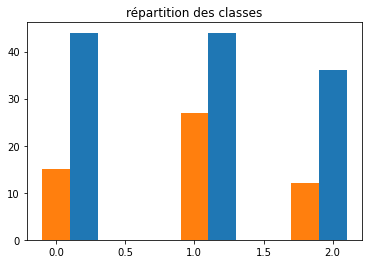

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_train, align="right", label="train") 
plt.hist(y_test, align="left", label="test") 
plt.title("répartition des classes") 
plt.show()

Il ne faut pas hésiter à recourir à des représentations graphiques quand vous manipulez les données. Ici on voit que la répartition des classes à prédire n'est pas homogène pour les données de test.  
On peut y remédier en utilisant le paramètre `stratify`

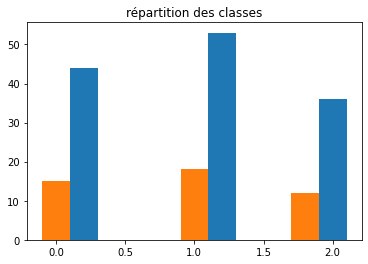

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.25, stratify=y_wine)
plt.hist(y_train, align="right", label="train") 
plt.hist(y_test, align="left", label="test") 
plt.title("répartition des classes") 
plt.show()

## Entraînement

L'étape suivante est de choisir un algorithme (un *estimator*), de l'entraîner sur nos données train (avec la fonction `fit()`) puis de faire la prédiction (avec la fonction `predict`).  
Quelque soit l'algo choisi vous allez retrouver les fonctions `fit` et `predict`. Ce qui changera ce seront les paramètres à passer au constructeur de la classe de l'algo. Votre travail portera sur le choix de ces paramètres.  
Exemple un peu bateau avec une méthode de type SVM.

In [121]:
from sklearn.svm import SVC
clf = SVC(C=1, kernel="linear")
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [122]:
clf.predict(X_test)

array([0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2,
       1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0,
       2])

## Évaluation

On fait l'évaluation en confrontant les prédictions sur les X_test et les y_test. La fonction `score` nous donne l'*accuracy* moyenne du modèle.

In [123]:
clf.score(X_test, y_test)

0.9555555555555556

Pour la classification il existe une classe bien pratique : `sklearn.metrics.classification_report`

In [124]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.89      0.94        18
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



### ✍️  Exo ✍️

1. Essayez un autre algo de classification (linear SVM par exemple) et comparez les résultats.
2. Sur ce même algo, refaites une partition train/test et comparez l'évaluation avec les résultats précédents. 

Pour améliorer la robustesse de l'évaluation on va utiliser la cross validation. `scikit-learn` a des classes pour ça. 

In [125]:
from sklearn.model_selection import cross_validate, cross_val_score
print(cross_validate(SVC(C=1, kernel="linear"), X_wine, y_wine)) # infos d'accuracy mais aussi de temps
print(cross_val_score(SVC(C=1, kernel="linear"), X_wine, y_wine)) # uniquement accuracy

{'fit_time': array([0.0612123 , 0.05283165, 0.06050134, 0.05603337, 0.04929996]), 'score_time': array([0.00044656, 0.00036573, 0.0002799 , 0.00033069, 0.00024843]), 'test_score': array([0.88888889, 0.94444444, 0.97222222, 1.        , 1.        ])}
[0.88888889 0.94444444 0.97222222 1.         1.        ]


## Optimisation des hyperparamètres

L'optimisation des hyperparamètres est la dernière étape. Ici encore `scikitlearn` nous permet de le faire de manière simple et efficace. Nous utiliserons `sklearn.model_selection.GridSearchCV` qui fait une recherche exhaustive sur tous les paramètres donnés au constructeur. Cette classe utilise aussi la cross validation.

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid =  {'C': [0.1, 0.5, 1, 10, 100, 1000], 'kernel':['rbf','linear']}
grid = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy')
estimator = grid.fit(X_wine, y_wine)
estimator.cv_results_

{'mean_fit_time': array([0.00238857, 0.04508266, 0.00092287, 0.05651126, 0.00086303,
        0.05200019, 0.00080914, 0.12059216, 0.00093904, 0.11793842,
        0.00149984, 0.11815362]),
 'std_fit_time': array([7.30071506e-04, 1.62103344e-02, 2.74984180e-05, 2.12206049e-02,
        2.22915124e-05, 4.64263528e-03, 1.94227897e-05, 3.33829484e-02,
        5.69936310e-05, 3.26098565e-02, 1.76022123e-04, 3.33279335e-02]),
 'mean_score_time': array([0.00068145, 0.00039501, 0.00031018, 0.00026131, 0.00030513,
        0.00026674, 0.00030069, 0.00034618, 0.00030479, 0.00031285,
        0.0002902 , 0.00027981]),
 'std_score_time': array([1.67366270e-04, 2.75578876e-05, 3.53631901e-06, 1.01287217e-05,
        2.47496400e-06, 4.19571722e-05, 7.60760773e-06, 3.78546842e-05,
        1.24787473e-05, 2.99836934e-05, 9.67920706e-06, 2.39582084e-05]),
 'param_C': masked_array(data=[0.1, 0.1, 0.5, 0.5, 1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, Fals

In [129]:
df = pd.DataFrame(estimator.cv_results_)
df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.056511,0.021221,0.000261,0.000010,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.944444,0.944444,0.944444,1.000000,1.000000,0.966667,0.027217,1
1,0.045083,0.016210,0.000395,0.000028,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.916667,0.916667,0.972222,1.000000,1.000000,0.961111,0.037680,2
5,0.052000,0.004643,0.000267,0.000042,1,linear,"{'C': 1, 'kernel': 'linear'}",0.888889,0.944444,0.972222,1.000000,1.000000,0.961111,0.041574,2
7,0.120592,0.033383,0.000346,0.000038,10,linear,"{'C': 10, 'kernel': 'linear'}",0.888889,0.972222,0.944444,1.000000,1.000000,0.961111,0.041574,2
9,0.117938,0.032610,0.000313,0.000030,100,linear,"{'C': 100, 'kernel': 'linear'}",0.888889,0.972222,0.944444,1.000000,1.000000,0.961111,0.041574,2
11,0.118154,0.033328,0.000280,0.000024,1000,linear,"{'C': 1000, 'kernel': 'linear'}",0.888889,0.972222,0.944444,1.000000,1.000000,0.961111,0.041574,2
10,0.001500,0.000176,0.000290,0.000010,1000,rbf,"{'C': 1000, 'kernel': 'rbf'}",0.833333,0.861111,0.944444,0.914286,0.914286,0.893492,0.040320,7
8,0.000939,0.000057,0.000305,0.000012,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.750000,0.694444,0.694444,0.742857,0.828571,0.742063,0.049158,8
6,0.000809,0.000019,0.000301,0.000008,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.750000,0.666667,0.666667,0.714286,0.800000,0.719524,0.051030,9
0,0.002389,0.000730,0.000681,0.000167,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.666667,0.611111,0.694444,0.657143,0.742857,0.674444,0.043477,10


# Classification de textes

Vous trouverez un exemple de classification proposé par `scikitlearn` ici : https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html et de la doc sur les features des documents textuels ici : https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

La classification avec des techniques non neuronales repose en grande partie sur les features utilisées pour représenter les textes.

In [155]:
from sklearn.datasets import fetch_20newsgroups

categories = [ 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space']

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True)

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True)

In [158]:
print(len(data_train.data))
print(len(data_test.data))

2373
1579


Ici on a un jeu de 2373 textes catégorisés pour train. À nous d'en extraire les features désirées. 
tfidf est un grand classique. Vous pouvez réutiliser votre propre scritp ou la classe de `scikitlearn`

Attention aux valeurs par défaut des paramètres. Ici par exemple on passe tout en minuscule et la tokenisation est rudimentaire. Ça fonctionnera mal pour d'autres langues que l'anglais.

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
X_train = vectorizer.fit_transform(data_train.data) # données de train vectorisées
y_train = data_train.target

In [166]:
X_test = vectorizer.transform(data_test.data)
y_test = data_test.target

In [165]:
# Pour l'entraînement et l'éval on reprend le code vu auparavant

clf = SVC(C=1, kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       396
           1       0.85      0.96      0.90       393
           2       0.94      0.92      0.93       396
           3       0.98      0.93      0.96       394

    accuracy                           0.94      1579
   macro avg       0.94      0.94      0.94      1579
weighted avg       0.94      0.94      0.94      1579



Essayez avec d'autres features. La longueur moyennes des mots, le nombre d'adjectifs, la présence d'entités nommées, …

## Et les réseaux de neurones ?

`scikitlearn` permet d'utiliser un Multi-layer Perceptron (MLP). Et comme la bibliothèque ne permet pas d'utiliser un GPU pour les calculs, son utilisation est limitée à des jeux de données de taille moyenne.  
`scikitlearn` n'est pas fait pour le deep learning. Il existe des bib associées qui permettent de combiner Keras ou pytorch avec `scikitlearn` néanmoins.

Essayons ensemble en suivant la doc de https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html